In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load) 
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_data = pd.merge(city_data, ride_data, on="city")

# Display the data table for preview
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
pyber_data["size"] = pyber_data["type"] 

pyber_data = pyber_data.set_index(["type"])

## Bubble Plot of Ride Sharing Data

In [27]:
# Obtain the x and y coordinates for each of the three city types

urban_data = pyber_data.loc[pyber_data["size"] == "Urban"]                
urban_drivers = urban_data.groupby(["city"]).first()["driver_count"]
urban_rides = urban_data.groupby(["city"]).count()["ride_id"]
urban_fares = urban_data.groupby(["city"]).mean()['fare']

suburban_data = pyber_data.loc[pyber_data["size"] == "Suburban"]                
suburban_drivers = suburban_data.groupby(["city"]).first()["driver_count"]
suburban_rides = suburban_data.groupby(["city"]).count()["ride_id"]
suburban_fares = suburban_data.groupby(["city"]).mean()['fare']

rural_data = pyber_data.loc[pyber_data["size"] == "Rural"]                
rural_drivers = rural_data.groupby(["city"]).first()["driver_count"]
rural_rides = rural_data.groupby(["city"]).count()["ride_id"]
rural_fares = rural_data.groupby(["city"]).mean()['fare']    

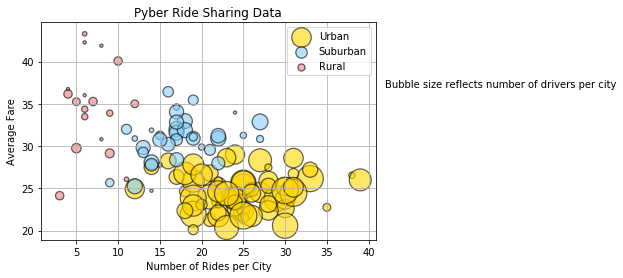

In [24]:
# Build the scatter plots for each city types

urban_plot = plt.scatter(urban_rides,urban_fares, s=urban_drivers*10, 
                         c="Gold", alpha=.6, linewidths=1.25, edgecolors="black", label="Urban");

suburban_plot = plt.scatter(suburban_rides,suburban_fares, s=suburban_drivers*10, c="lightskyblue", 
            alpha=.6, linewidths=1.25, edgecolors="black", label="Suburban");

rural_plot = plt.scatter(rural_rides,rural_fares, s=rural_drivers*10, c="lightcoral", 
            alpha=.6, linewidths=1.25, edgecolors="black", label="Rural")

#Place legend on axis subplots
plt.title("Pyber Ride Sharing Data")

# Incorporate the other graph properties
plt.xlabel("Number of Rides per City")
plt.ylabel("Average Fare")
plt.legend(loc="upper right")
plt.grid()

# Incorporate a text label regarding circle size

plt.text(42,37, "Bubble size reflects number of drivers per city")

# Save Figure
plt.savefig("../Pyber/PyberBubble.png")

In [5]:
# Show plot
plt.show()

## Total Fares by City Type

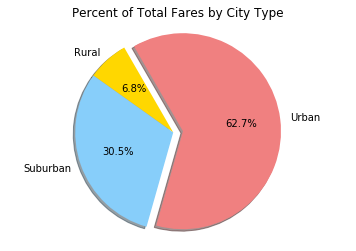

In [14]:
# Calculate Type Percents
fares_ttl = pyber_data.groupby(["size"]).sum()["fare"]

city_types = ["Rural", "Suburban", "Urban"]      
colors = ["gold","lightskyblue","lightcoral"]   
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie([x for x in fares_ttl], explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)

plt.title("Percent of Total Fares by City Type")

plt.axis("equal")
# Save Figure
plt.savefig("../Pyber/TotalFares.png")

In [7]:
# Show Figure
plt.show()

## Total Rides by City Type

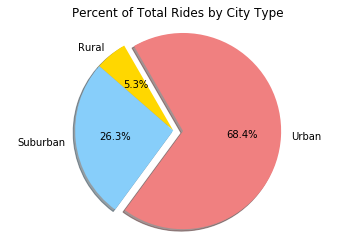

In [8]:
# Calculate Ride Percents
rides_ttl = pyber_data.groupby(["size"]).count()["ride_id"]

# Build Pie Chart
plt.pie([x for x in rides_ttl], explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)

plt.title("Percent of Total Rides by City Type")

plt.axis("equal")

# Save Figure
plt.savefig("../Pyber/TotalRides.png")

In [9]:
# Show Figure
plt.show()

## Total Drivers by City Type

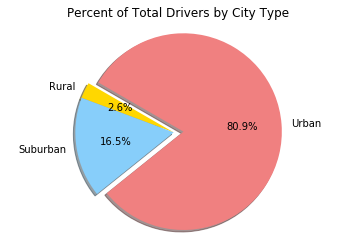

In [13]:
# Calculate Driver Percents
drivers_ttl = [rural_drivers.sum(),suburban_drivers.sum(),urban_drivers.sum()]

# Build Pie Chart
plt.pie([x for x in drivers_ttl], explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

plt.title("Percent of Total Drivers by City Type")

plt.axis("equal")

# Save Figure
plt.savefig("../Pyber/TotalDrivers.png")

In [11]:
# Show Figure
plt.show()

### Analysis

* The more rides people are taking in a city, the cheaper their rides will be. Rides in rural areas get pretty pricey!
* Urban rides make up about two thirds of all of Pyber's total revenue and rides taken.
* Most rides outside of urban areas are over $\$$30, and most rides in urban areas are below $\$$30.